In [1]:
import torch
from torch import nn

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. Data

In [3]:
# Import csv
# ! TODO Data à normaliser !!!!!!!!!!!
df = pd.read_csv("./1_label_encoded.csv")
print(f"Nombre de classes:{len(df['label'].unique())}")
df 

Nombre de classes:10


,zcr,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,35042,1648.884832,3760.300129,-233.72897,101.190280,17.647953,23.734175,2.082544,25.936400,-16.956388,...,-6.050580,-5.067928,1.059271,-5.786866,-8.313065,-11.382150,-6.724381,-10.016953,-14.028803,0
1,34067,1324.527825,2711.484919,-209.80392,124.464760,10.309394,47.016357,6.478227,15.415120,-2.015942,...,-2.195728,-3.049186,8.643512,-0.307013,-0.632918,-2.933559,-1.706299,-1.767315,-7.755139,0
2,77661,2280.154186,4732.983059,-144.92339,95.732994,-21.616442,49.626270,-29.887520,29.351145,-18.850819,...,6.359987,-21.088718,2.466054,-9.539148,-1.405819,-9.312422,5.155150,-8.118464,-2.440217,0
3,52454,1817.230590,3943.831966,-213.26424,115.164760,-11.698170,39.015358,-20.348330,13.082702,-9.182701,...,3.785836,0.222636,-5.106882,-0.410153,-1.179345,-1.914708,-2.293661,2.884260,-4.233880,0
4,23406,1151.310495,2312.179728,-301.70804,111.533280,21.896053,16.150570,8.198790,22.081917,-8.601798,...,-10.576027,-15.687029,-12.606835,-12.262773,-14.563126,-10.112008,-5.792038,-7.775544,-7.187529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44147,1712.289371,3618.402482,-91.91241,129.968630,1.837280,11.621115,3.225763,-1.972075,-2.219356,...,-0.541918,0.402013,-1.647391,-4.572026,-2.969680,-4.286571,-2.672042,-3.548642,-1.441460,9
996,91248,2794.819916,5878.156438,-74.18399,76.735054,-3.804385,28.033630,8.136066,6.016018,4.299718,...,-0.285972,-1.456242,-3.607940,-1.527027,-1.517323,-5.024079,-2.399194,-2.978554,-4.949774,9
997,103530,2997.853838,5962.265829,-58.31212,62.513275,-12.654888,31.943604,8.115569,2.260641,3.907080,...,-2.379529,1.242484,-1.495535,-0.466529,1.043452,-2.066976,-1.508879,-3.209724,-5.058255,9
998,80163,2255.867398,4508.882867,-185.50003,98.925780,-36.442880,44.427536,-17.759829,21.284357,-20.293684,...,2.334638,-12.634641,0.150813,-4.400121,-2.465571,-8.966494,6.872224,-6.697355,-1.207782,9


In [4]:
# df to numpy

y = df['label'].to_numpy()
x = df.drop(columns=['label']).to_numpy() # ! Type issue ?

print("X shape =>",x.shape,"\ny shape =>", y.shape)
y[:3], x[:3]

X shape => (1000, 23) 
y shape => (1000,)


(array([0, 0, 0]),
 array([[ 3.50420000e+04,  1.64888483e+03,  3.76030013e+03,
         -2.33728970e+02,  1.01190280e+02,  1.76479530e+01,
          2.37341750e+01,  2.08254400e+00,  2.59364000e+01,
         -1.69563880e+01,  1.50849550e+01, -2.22739560e+01,
          4.38161200e+00, -2.32016560e+01, -6.05057950e+00,
         -5.06792830e+00,  1.05927050e+00, -5.78686570e+00,
         -8.31306500e+00, -1.13821500e+01, -6.72438140e+00,
         -1.00169525e+01, -1.40288030e+01],
        [ 3.40670000e+04,  1.32452783e+03,  2.71148492e+03,
         -2.09803920e+02,  1.24464760e+02,  1.03093940e+01,
          4.70163570e+01,  6.47822700e+00,  1.54151200e+01,
         -2.01594160e+00,  6.72621870e+00, -2.15432220e+01,
          1.07208350e+01, -5.53284650e+00, -2.19572760e+00,
         -3.04918580e+00,  8.64351200e+00, -3.07013000e-01,
         -6.32917760e-01, -2.93355870e+00, -1.70629910e+00,
         -1.76731510e+00, -7.75513900e+00],
        [ 7.76610000e+04,  2.28015419e+03,  4.7329830

In [5]:
# numpy to tensor

# x = torch.from_numpy(x).type(torch.float64)
# y = torch.from_numpy(y).type(torch.float64)
x = torch.from_numpy(x).type(torch.float32)
# y = torch.from_numpy(y).type(torch.float32)
y = torch.from_numpy(y).type(torch.long)

# x = torch.from_numpy(x)
# y = torch.from_numpy(y)

x[:3], y[:3]

(tensor([[ 3.5042e+04,  1.6489e+03,  3.7603e+03, -2.3373e+02,  1.0119e+02,
           1.7648e+01,  2.3734e+01,  2.0825e+00,  2.5936e+01, -1.6956e+01,
           1.5085e+01, -2.2274e+01,  4.3816e+00, -2.3202e+01, -6.0506e+00,
          -5.0679e+00,  1.0593e+00, -5.7869e+00, -8.3131e+00, -1.1382e+01,
          -6.7244e+00, -1.0017e+01, -1.4029e+01],
         [ 3.4067e+04,  1.3245e+03,  2.7115e+03, -2.0980e+02,  1.2446e+02,
           1.0309e+01,  4.7016e+01,  6.4782e+00,  1.5415e+01, -2.0159e+00,
           6.7262e+00, -2.1543e+01,  1.0721e+01, -5.5328e+00, -2.1957e+00,
          -3.0492e+00,  8.6435e+00, -3.0701e-01, -6.3292e-01, -2.9336e+00,
          -1.7063e+00, -1.7673e+00, -7.7551e+00],
         [ 7.7661e+04,  2.2802e+03,  4.7330e+03, -1.4492e+02,  9.5733e+01,
          -2.1616e+01,  4.9626e+01, -2.9888e+01,  2.9351e+01, -1.8851e+01,
           1.7902e+01, -9.6708e+00,  5.5167e+00, -9.5574e+00,  6.3600e+00,
          -2.1089e+01,  2.4661e+00, -9.5391e+00, -1.4058e+00, -9.3124e+00,


In [6]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 23]),
 torch.Size([200, 23]),
 torch.Size([800]),
 torch.Size([200]))

# 2. Model

In [7]:
class MusicClassifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_unit):
        """
        Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        # ! Try RELU
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_unit, dtype=torch.float32),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit, out_features=hidden_unit, dtype=torch.float32),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit, out_features=output_features, dtype=torch.float32)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

torch.manual_seed(42)
model_0 = MusicClassifier(input_features=23, output_features=10, hidden_unit=23).to(device)

model_0

MusicClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=23, out_features=23, bias=True)
    (1): ReLU()
    (2): Linear(in_features=23, out_features=23, bias=True)
    (3): ReLU()
    (4): Linear(in_features=23, out_features=10, bias=True)
  )
)

In [8]:
# Loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.0000001)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(input=y_true, other=y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 # Calcul simple de pourcentage
    return acc

In [9]:
# Quick forward pass
y_logits_quick_test = model_0(X_test.to(device))
torch.softmax(y_logits_quick_test, dim=1).argmax(dim=1)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')

# 3. Training

In [10]:
torch.manual_seed(42)

epochs = 1000

loss_history = []
acc_history = []
test_loss_history = []
test_acc_history = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    '''
    Train
    '''
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Metrics
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 2.1 Save metrics
    loss_history.append(loss.cpu().detach().numpy())
    acc_history.append(acc)

    # 3. Zero Grad
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimmizer step
    optimizer.step()

    '''
    Test
    '''
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass
        y_test_logits = model_0(X_test)
        y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

        # 2. Metrics
        test_loss = loss_fn(y_test_logits,
                            y_test)
        test_acc = accuracy_fn(y_pred=y_test_pred,
                               y_true=y_test)
        
        # 2.1 Save metrics
        test_loss_history.append(test_loss.cpu().detach().numpy())
        test_acc_history.append(test_acc)
    
    # Print out what's happening
    if epoch % 1 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 684.47717, Acc: 9.88% | Test Loss: 586.56372, Test Acc: 10.50%
Epoch: 1 | Loss: 667.00085, Acc: 9.88% | Test Loss: 570.87305, Test Acc: 10.50%
Epoch: 2 | Loss: 649.56561, Acc: 9.88% | Test Loss: 555.21802, Test Acc: 10.50%
Epoch: 3 | Loss: 632.16919, Acc: 9.88% | Test Loss: 539.59656, Test Acc: 10.50%
Epoch: 4 | Loss: 614.80981, Acc: 9.88% | Test Loss: 524.00885, Test Acc: 10.50%
Epoch: 5 | Loss: 597.48657, Acc: 9.88% | Test Loss: 508.45563, Test Acc: 10.50%
Epoch: 6 | Loss: 580.20081, Acc: 9.88% | Test Loss: 492.97989, Test Acc: 10.50%
Epoch: 7 | Loss: 562.97845, Acc: 9.88% | Test Loss: 477.78961, Test Acc: 10.50%
Epoch: 8 | Loss: 546.12012, Acc: 9.88% | Test Loss: 463.94031, Test Acc: 10.50%
Epoch: 9 | Loss: 530.76617, Acc: 9.88% | Test Loss: 451.39932, Test Acc: 10.50%
Epoch: 10 | Loss: 516.75366, Acc: 9.88% | Test Loss: 439.64960, Test Acc: 10.50%
Epoch: 11 | Loss: 503.78708, Acc: 9.88% | Test Loss: 428.63214, Test Acc: 10.50%
Epoch: 12 | Loss: 491.48636, Acc: 9.88

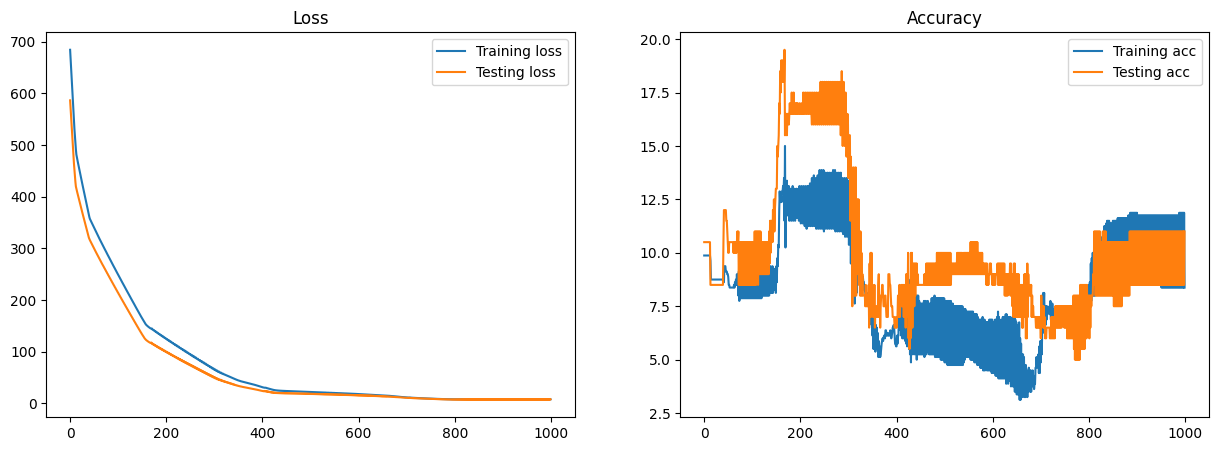

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epochs), loss_history, label="Training loss")
plt.plot(range(epochs), test_loss_history, label="Testing loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(range(epochs), acc_history, label="Training acc")
plt.plot(range(epochs), test_acc_history, label="Testing acc")
plt.legend()
plt.title("Accuracy")

plt.show()